# INSTALLING LIBRARIES


In [ ]:
conda install tensorflow


In [ ]:
conda install matplotlib

In [ ]:
conda install libopencv

In [ ]:
conda install -c conda-forge opencv python=3.7.4


In [31]:
pip install --upgrade opencv-contrib-python 


     ---------------------------------------- 44.9/44.9 MB 2.8 MB/s eta 0:00:00


# IMPORTING NECESSARY LIBRARIES

In [1]:
import cv2


In [2]:
import tensorflow as tf
import numpy
import matplotlib
from matplotlib import pyplot as plt
import os

In [3]:
dir='data'

# READING IMAGE USING CV2 AND DISPLYING IT VIA PYPLOT

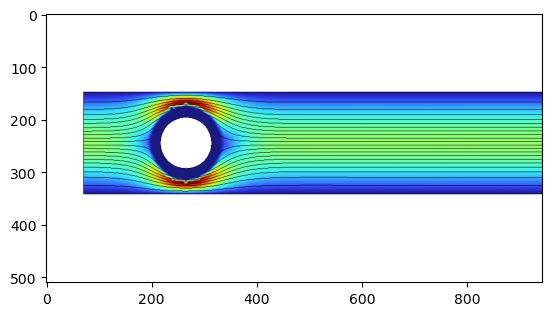

In [4]:
imgl=cv2.imread(os.path.join(dir,'laminar','laminar5.png'))
imgl.shape
plt.imshow(cv2.cvtColor(imgl,cv2.COLOR_BGR2RGB))
plt.show()

# SETTING THE DIRECTORY WHICH CONTAINS THE DATA SET

In [5]:
for image_class in os.listdir(dir):
    for image in os.listdir(os.path.join(dir,image_class)):
        image_path=os.path.join(dir,image_class,image)
        img=cv2.imread(image_path)
        

# Importing data using keras

In [74]:
data=tf.keras.utils.image_dataset_from_directory('data',batch_size=60,image_size=(256,512))

Found 300 files belonging to 2 classes.


In [75]:
data_iterator=data.as_numpy_iterator()

In [76]:
batch=data_iterator.next()

In [77]:
batch[0].shape

(60, 256, 512, 3)

# PLOTTING IMAGES AND OBSERVING THE LABLING OF DATASET
## Here turbulent flow is assigned 1 and laminar flow is assigned 0

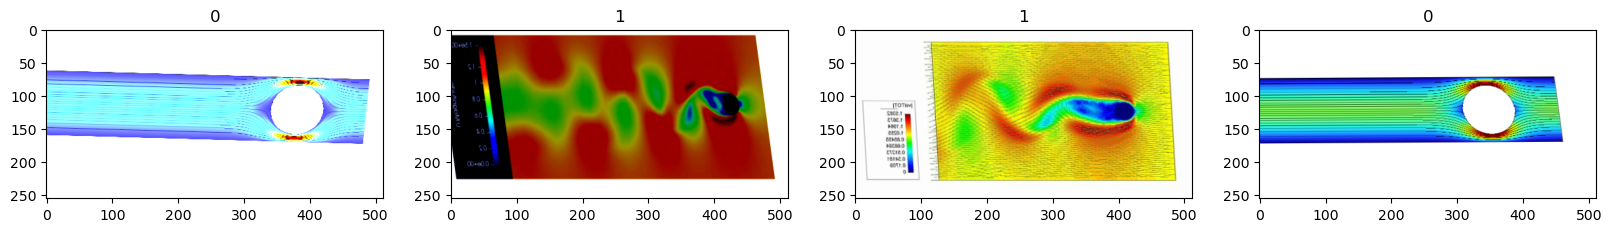

In [78]:
img, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

# Mapping the images with their corresponding labels using lambda function and scaling images
## A lambda operator or lambda function is used for creating small, one-time, anonymous function objects in Python,in our case, a tuple.

In [79]:
data=data.map(lambda x,y: (x/255, y))


In [80]:
scaled_iterator=data.as_numpy_iterator()


In [81]:
batch=scaled_iterator.next()

In [82]:
batch[0].max()

1.0

# SETTING THE SIZE OF TRAINING, VALIDATION, AND TEST DATA

In [83]:
train_size=3
val_size=1
test_size=1

In [84]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [85]:
len(train)

3

# CREATING AN CNN MODEL USING TENSORFLOW

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,AveragePooling2D,concatenate

In [139]:
model=Sequential()

In [140]:

model.add(Conv2D(64,(8,8),3, activation='relu' ,input_shape=(256,512,3)))
model.add(MaxPooling2D())

model.add(Conv2D(256,(8,8),2, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256,(4,4),1, activation='relu'))
model.add(Conv2D(256,(3,3),1, activation='relu'))
model.add(Conv2D(128,(2,2),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [141]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [143]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 83, 169, 64)       12352     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 41, 84, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 17, 39, 256)       1048832   
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 8, 19, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 5, 16, 256)        1048832   
                                                                 
 conv2d_98 (Conv2D)          (None, 3, 14, 256)      

# CREATING A LOG DIRECTORY TO STORE OUR MODEL 

In [123]:
logdir='log'

In [144]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [145]:
hist=model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
3/3 [==============================] - 19s 6s/step - loss: 0.9038 - accuracy: 0.4667 - val_loss: 0.6887 - val_accuracy: 0.5333
Epoch 2/10
3/3 [==============================] - 17s 6s/step - loss: 0.6920 - accuracy: 0.5333 - val_loss: 0.6911 - val_accuracy: 0.4667
Epoch 3/10
3/3 [==============================] - 17s 6s/step - loss: 0.6805 - accuracy: 0.5167 - val_loss: 0.6352 - val_accuracy: 0.6500
Epoch 4/10
3/3 [==============================] - 17s 6s/step - loss: 0.6520 - accuracy: 0.5389 - val_loss: 0.7046 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 17s 6s/step - loss: 0.6302 - accuracy: 0.5778 - val_loss: 0.5679 - val_accuracy: 0.7167
Epoch 6/10
3/3 [==============================] - 18s 6s/step - loss: 0.6024 - accuracy: 0.6333 - val_loss: 0.4925 - val_accuracy: 0.7500
Epoch 7/10
3/3 [==============================] - 17s 6s/step - loss: 0.5938 - accuracy: 0.7222 - val_loss: 0.5189 - val_accuracy: 0.8333
Epoch 8/10
3/3 [==================

# PLOTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

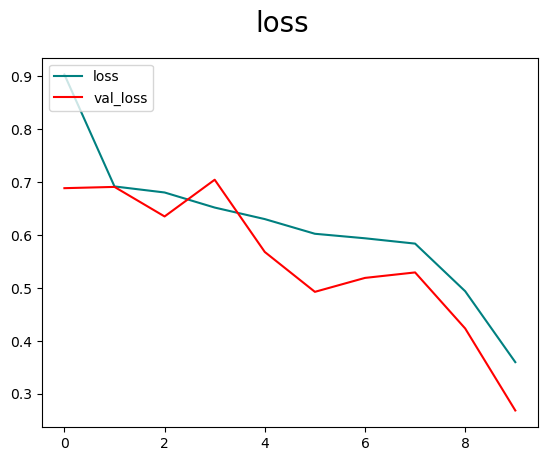

In [146]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()


# PLOTTING ACCURACY

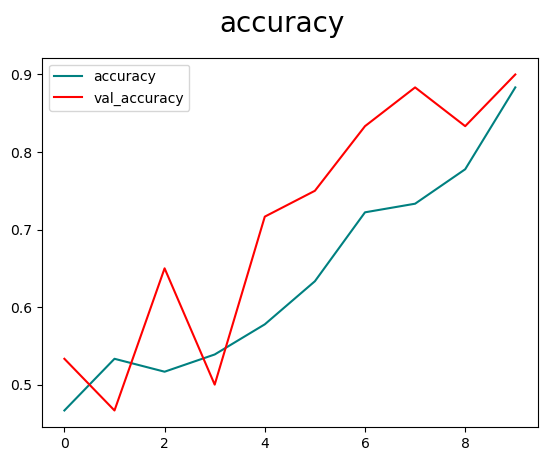

In [147]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [148]:
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy

In [149]:
pre= Precision()
recall= Recall()
acc= BinaryAccuracy()

In [150]:
for batch in test.as_numpy_iterator():
    x, y= batch
    Y=model.predict(x)
    pre.update_state(y,Y)
    recall.update_state(y,Y)
    acc.update_state(y,Y)

2/2 [==============================] - 1s 587ms/step


In [151]:
print(f'precision: {pre.result().numpy()},recall: {recall.result().numpy()} ,accuracy: {acc.result().numpy()}')

precision: 0.931034505367279,recall: 0.8709677457809448 ,accuracy: 0.8999999761581421


# TESTING ON RANDOM INTERNET IMAGES TO CHECK OVERFITTING OF DATA
## Model performed quite well on the unseen data from internet

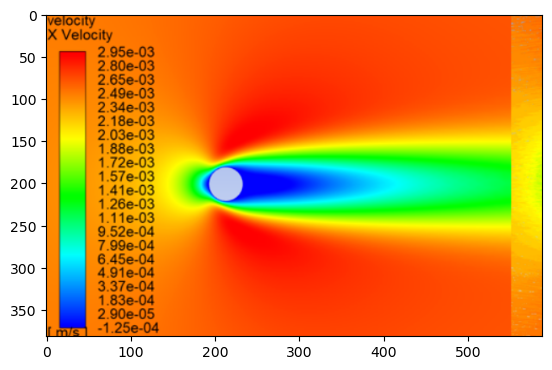

In [179]:
img=cv2.imread('LAMINAR_TEST.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

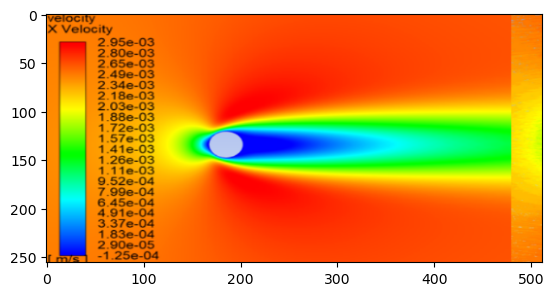

In [180]:
resized_image= tf.image.resize(img,(256,512))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [181]:
numpy.expand_dims(resized_image,0).shape

(1, 256, 512, 3)

In [184]:
result= model.predict(numpy.expand_dims(resized_image/255, 0))
if result>=0.5:
    print('TURBULENT FLOW')
else:
    print('LAMINAR FLOW')

1/1 [==============================] - 0s 80ms/step
LAMINAR FLOW


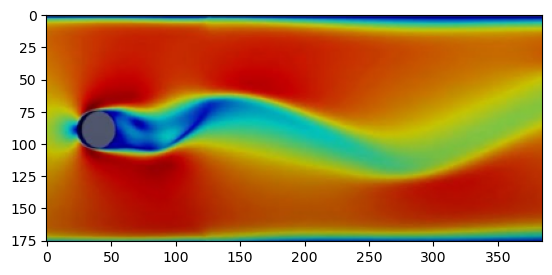

In [185]:
img=cv2.imread('TURBULENT_TEST.png')
img= cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

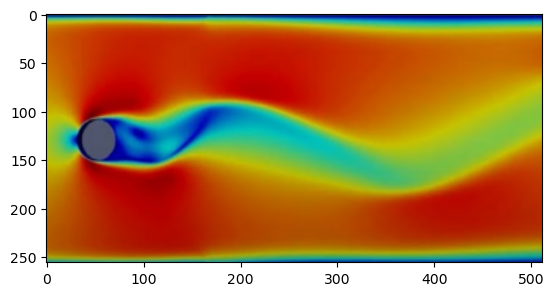

In [186]:
resized_image= tf.image.resize(img,(256,512))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [187]:
result= model.predict(numpy.expand_dims(resized_image/255, 0))
if result>=0.5:
    print('TURBULENT FLOW')
else:
    print('LAMINAR FLOW')

1/1 [==============================] - 0s 41ms/step
TURBULENT FLOW
